# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

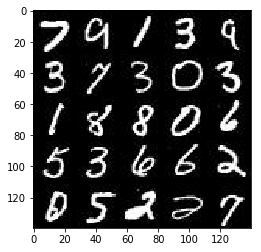

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

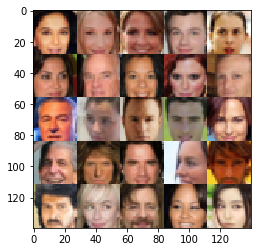

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [32]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image_input_real = tf.placeholder(tf.float32,shape=(None,image_width, image_height, image_channels),name='input_real')
    image_input_fake = tf.placeholder(tf.float32,shape=(None,z_dim),name='input_fake')
    learning_rate = tf.placeholder(tf.float32)
    return image_input_real, image_input_fake, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [33]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     with tf.variable_scope('discriminator',reuse=reuse):
#         # Hidden layer
#         h1 = tf.layers.dense(images, 128, activation=None)
#         # Leaky ReLU
#         h1 = tf.maximum(0.01 * h1, h1)
        
#         logits = tf.layers.dense(h1, 1, activation=None)
#         logits = tf.reshape(logits,(-1,))
        
#         out = tf.sigmoid(logits)
#   return out, logits

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28*X
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2 * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 7x7x128

        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 4x4x256
        
        x2 = tf.layers.conv2d(relu1, 512, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 2x2x512
        
        # Flatten it
        flat = tf.reshape(relu2, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [34]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        # 14x14x256 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim now
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [35]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [36]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [42]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#     tf.reset_default_graph()
    # Create our input placeholders
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], len(data_image_mode), z_dim)
    l_rate = learning_rate
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, l_rate, beta1)
    
    samples = []
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 0
            for batch_images in get_batches(batch_size):
                i += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_z = batch_z.reshape(batch_size, z_dim)  
                
                # TODO: Train Model
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2 - 1 
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # show output every 100 batches
                if i % 10 == 0:
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                    "Discriminator Loss: {:.4f}...".format(train_loss_d),
                    "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    losses.append((train_loss_d, train_loss_g))
                    
                if i % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                    sample_z = np.random.uniform(-1, 1, size=(16, z_dim))
                    gen_samples = sess.run(
                           generator(input_z, data_shape[3], is_train=False),
                           feed_dict={input_z: sample_z})
                    samples.append(gen_samples)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.2099
Epoch 1/2... Discriminator Loss: 0.5178... Generator Loss: 1.5850
Epoch 1/2... Discriminator Loss: 1.4782... Generator Loss: 0.4755
Epoch 1/2... Discriminator Loss: 0.9380... Generator Loss: 0.8225
Epoch 1/2... Discriminator Loss: 0.7938... Generator Loss: 1.0306
Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 0.7273
Epoch 1/2... Discriminator Loss: 1.1478... Generator Loss: 1.0197
Epoch 1/2... Discriminator Loss: 0.9049... Generator Loss: 1.0628
Epoch 1/2... Discriminator Loss: 0.8336... Generator Loss: 1.4846
Epoch 1/2... Discriminator Loss: 0.8502... Generator Loss: 0.7410


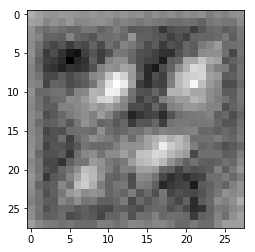

Epoch 1/2... Discriminator Loss: 0.5598... Generator Loss: 1.4388
Epoch 1/2... Discriminator Loss: 0.5006... Generator Loss: 1.7185
Epoch 1/2... Discriminator Loss: 0.5038... Generator Loss: 1.7970
Epoch 1/2... Discriminator Loss: 0.2770... Generator Loss: 2.2394
Epoch 1/2... Discriminator Loss: 0.8191... Generator Loss: 2.4275
Epoch 1/2... Discriminator Loss: 0.1917... Generator Loss: 2.2869
Epoch 1/2... Discriminator Loss: 0.2185... Generator Loss: 2.2222
Epoch 1/2... Discriminator Loss: 0.1270... Generator Loss: 2.5979
Epoch 1/2... Discriminator Loss: 0.1250... Generator Loss: 2.6822
Epoch 1/2... Discriminator Loss: 0.1010... Generator Loss: 2.9252


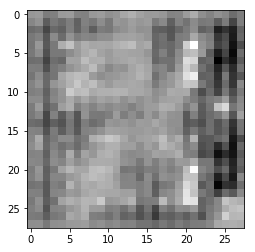

Epoch 1/2... Discriminator Loss: 0.1030... Generator Loss: 2.7496
Epoch 1/2... Discriminator Loss: 0.0945... Generator Loss: 2.9283
Epoch 1/2... Discriminator Loss: 0.0834... Generator Loss: 3.0153
Epoch 1/2... Discriminator Loss: 0.0678... Generator Loss: 3.3229
Epoch 1/2... Discriminator Loss: 0.0646... Generator Loss: 3.2860
Epoch 1/2... Discriminator Loss: 0.0537... Generator Loss: 3.4896
Epoch 1/2... Discriminator Loss: 0.0556... Generator Loss: 3.4040
Epoch 1/2... Discriminator Loss: 0.0506... Generator Loss: 3.4962
Epoch 1/2... Discriminator Loss: 0.0500... Generator Loss: 3.4962
Epoch 1/2... Discriminator Loss: 0.0449... Generator Loss: 3.7174


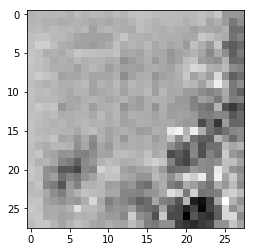

Epoch 1/2... Discriminator Loss: 0.0404... Generator Loss: 3.7858
Epoch 1/2... Discriminator Loss: 0.0383... Generator Loss: 3.8707
Epoch 1/2... Discriminator Loss: 0.0322... Generator Loss: 4.0480
Epoch 1/2... Discriminator Loss: 0.0296... Generator Loss: 4.0970
Epoch 1/2... Discriminator Loss: 0.0307... Generator Loss: 4.1775
Epoch 1/2... Discriminator Loss: 0.0270... Generator Loss: 4.2656
Epoch 1/2... Discriminator Loss: 0.0228... Generator Loss: 4.4566
Epoch 1/2... Discriminator Loss: 0.0263... Generator Loss: 4.3888
Epoch 1/2... Discriminator Loss: 0.0259... Generator Loss: 4.4296
Epoch 1/2... Discriminator Loss: 0.0211... Generator Loss: 4.6910


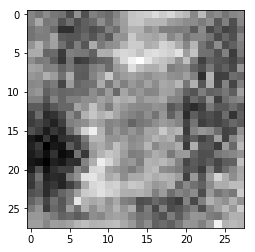

Epoch 1/2... Discriminator Loss: 0.0178... Generator Loss: 4.8606
Epoch 1/2... Discriminator Loss: 0.0175... Generator Loss: 4.8926
Epoch 1/2... Discriminator Loss: 0.0150... Generator Loss: 4.9954
Epoch 1/2... Discriminator Loss: 0.0131... Generator Loss: 5.0957
Epoch 1/2... Discriminator Loss: 0.0121... Generator Loss: 5.1981
Epoch 1/2... Discriminator Loss: 0.0118... Generator Loss: 5.2086
Epoch 1/2... Discriminator Loss: 0.0117... Generator Loss: 5.1823
Epoch 1/2... Discriminator Loss: 0.0106... Generator Loss: 5.2193
Epoch 1/2... Discriminator Loss: 0.0107... Generator Loss: 5.1921
Epoch 1/2... Discriminator Loss: 0.0094... Generator Loss: 5.3364


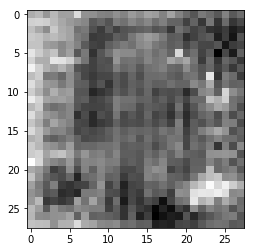

Epoch 1/2... Discriminator Loss: 0.0099... Generator Loss: 5.2796
Epoch 1/2... Discriminator Loss: 0.0104... Generator Loss: 5.1791
Epoch 1/2... Discriminator Loss: 0.0099... Generator Loss: 5.1321
Epoch 1/2... Discriminator Loss: 0.0107... Generator Loss: 5.0903
Epoch 1/2... Discriminator Loss: 0.0100... Generator Loss: 5.1786
Epoch 1/2... Discriminator Loss: 0.0096... Generator Loss: 5.1719
Epoch 1/2... Discriminator Loss: 0.0092... Generator Loss: 5.2472
Epoch 1/2... Discriminator Loss: 0.0084... Generator Loss: 5.2775
Epoch 1/2... Discriminator Loss: 0.0092... Generator Loss: 5.2491
Epoch 1/2... Discriminator Loss: 0.0086... Generator Loss: 5.2678


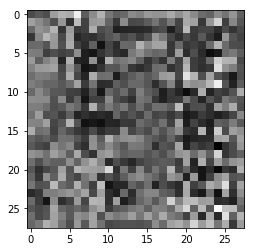

Epoch 1/2... Discriminator Loss: 0.0077... Generator Loss: 5.3854
Epoch 1/2... Discriminator Loss: 0.0073... Generator Loss: 5.5020
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.6405
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.6240
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.5938
Epoch 1/2... Discriminator Loss: 0.0067... Generator Loss: 5.6397
Epoch 1/2... Discriminator Loss: 0.0064... Generator Loss: 5.6909
Epoch 1/2... Discriminator Loss: 0.0061... Generator Loss: 5.7896
Epoch 1/2... Discriminator Loss: 0.0059... Generator Loss: 5.8099
Epoch 1/2... Discriminator Loss: 0.0054... Generator Loss: 5.8854


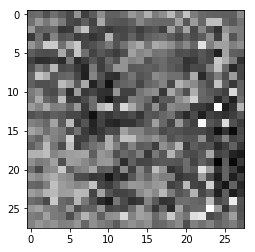

Epoch 1/2... Discriminator Loss: 0.0056... Generator Loss: 5.8737
Epoch 1/2... Discriminator Loss: 0.0063... Generator Loss: 5.7307
Epoch 1/2... Discriminator Loss: 0.0065... Generator Loss: 5.8721
Epoch 1/2... Discriminator Loss: 0.0063... Generator Loss: 5.9343
Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: 6.3900
Epoch 1/2... Discriminator Loss: 0.0049... Generator Loss: 6.4268
Epoch 1/2... Discriminator Loss: 0.0057... Generator Loss: 6.1066
Epoch 1/2... Discriminator Loss: 0.0044... Generator Loss: 6.4926
Epoch 1/2... Discriminator Loss: 0.0040... Generator Loss: 6.5602
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 6.5415


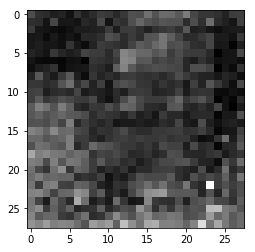

Epoch 1/2... Discriminator Loss: 0.0039... Generator Loss: 6.5246
Epoch 1/2... Discriminator Loss: 0.0036... Generator Loss: 6.5246
Epoch 1/2... Discriminator Loss: 0.0037... Generator Loss: 6.4926
Epoch 1/2... Discriminator Loss: 0.0034... Generator Loss: 6.4638
Epoch 1/2... Discriminator Loss: 0.0035... Generator Loss: 6.5605
Epoch 1/2... Discriminator Loss: 0.0038... Generator Loss: 6.4856
Epoch 1/2... Discriminator Loss: 0.0036... Generator Loss: 6.4109
Epoch 1/2... Discriminator Loss: 0.0036... Generator Loss: 6.4866
Epoch 1/2... Discriminator Loss: 0.0032... Generator Loss: 6.5696
Epoch 1/2... Discriminator Loss: 0.0033... Generator Loss: 6.5847


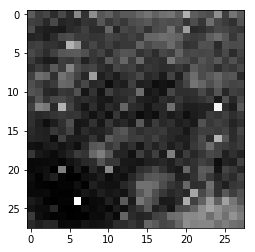

Epoch 1/2... Discriminator Loss: 0.0028... Generator Loss: 6.5555
Epoch 1/2... Discriminator Loss: 0.0028... Generator Loss: 6.5524
Epoch 1/2... Discriminator Loss: 0.0028... Generator Loss: 6.5500
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 6.3941
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 6.4731
Epoch 2/2... Discriminator Loss: 0.0028... Generator Loss: 6.5919
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 6.6459
Epoch 2/2... Discriminator Loss: 0.0026... Generator Loss: 6.6128
Epoch 2/2... Discriminator Loss: 0.0024... Generator Loss: 6.6412
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 6.6290
Epoch 2/2... Discriminator Loss: 0.0029... Generator Loss: 6.5420
Epoch 2/2... Discriminator Loss: 0.0026... Generator Loss: 6.6474
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 6.6784


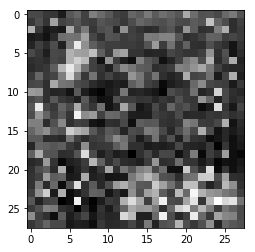

Epoch 2/2... Discriminator Loss: 0.0021... Generator Loss: 6.8058
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 6.7639
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 6.7281
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.8682
Epoch 2/2... Discriminator Loss: 0.0021... Generator Loss: 6.8380
Epoch 2/2... Discriminator Loss: 0.0021... Generator Loss: 6.9053
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.8881
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.9074
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.8585
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 6.9597


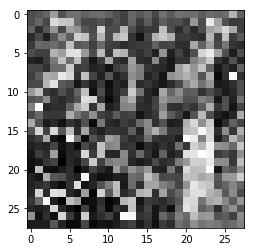

Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.0122
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 6.9857
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.1000
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.1325
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.0976
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.1664
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.1477
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.1598
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.1336
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.1219


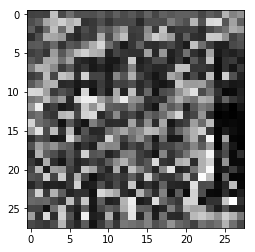

Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.1441
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.0925
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.1666
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.1324
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 7.1599
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.2272
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.2471
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.3746
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.3133
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.3340


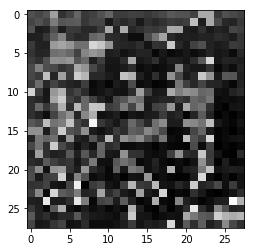

Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.3908
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.4094
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.4188
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.3508
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.3597
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.4672
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.3929
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.2396
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.3759
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.6385


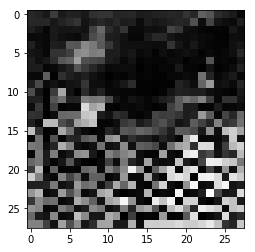

Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.6763
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.9151
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.8064
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.9177
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.8639
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7589
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 8.0973
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.8345
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.9711
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 7.5940


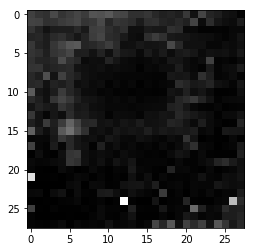

Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 7.4795
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 8.0509
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7672
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7873
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.8329
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7148
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7440
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7124
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.7932
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8580


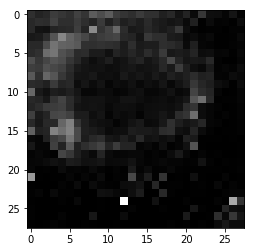

Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.8727
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8341
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8713
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9101
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8759
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8047
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8488
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9346
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9516
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8682


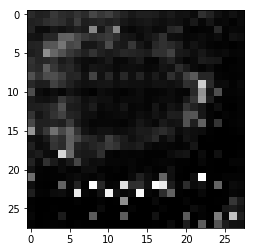

Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.8444
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9096
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9120
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.9034
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9512
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9744
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.9906
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 8.0139
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.0688
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 8.0646


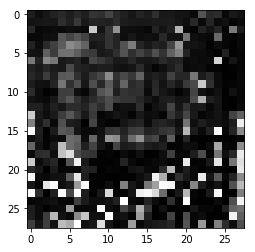

Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 8.0252
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.8713
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.9101


In [43]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.001


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6856... Generator Loss: 1.2052
Epoch 1/1... Discriminator Loss: 1.5802... Generator Loss: 1.2106
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 1.0825
Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 1.0864
Epoch 1/1... Discriminator Loss: 1.7119... Generator Loss: 0.9630
Epoch 1/1... Discriminator Loss: 1.5921... Generator Loss: 0.9952
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 1.0253
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.8555
Epoch 1/1... Discriminator Loss: 1.7064... Generator Loss: 0.8401


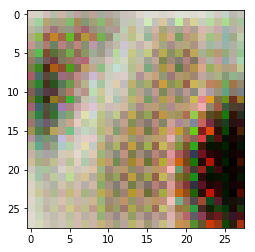

Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.9876
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.5880
Epoch 1/1... Discriminator Loss: 1.5209... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.4918... Generator Loss: 1.2519
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 1.2888
Epoch 1/1... Discriminator Loss: 1.2512... Generator Loss: 1.0415
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.8849


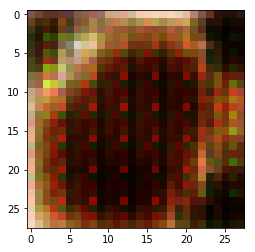

Epoch 1/1... Discriminator Loss: 1.6354... Generator Loss: 0.9794
Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 1.4307
Epoch 1/1... Discriminator Loss: 1.2317... Generator Loss: 1.1286
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.9227
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.4506
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 1.3746


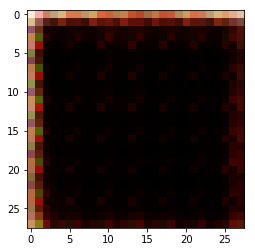

Epoch 1/1... Discriminator Loss: 1.0372... Generator Loss: 1.4385
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 1.5473
Epoch 1/1... Discriminator Loss: 1.7248... Generator Loss: 1.1461
Epoch 1/1... Discriminator Loss: 1.5456... Generator Loss: 0.3428
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 0.4817
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.1698
Epoch 1/1... Discriminator Loss: 0.8784... Generator Loss: 1.6550
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 1.5715
Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 1.5858
Epoch 1/1... Discriminator Loss: 1.3544... Generator Loss: 0.9590


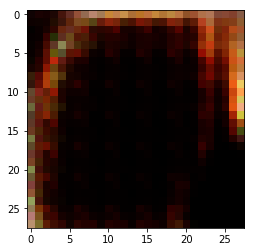

Epoch 1/1... Discriminator Loss: 0.9918... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.5939... Generator Loss: 0.2998
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 1.0786
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 0.9511
Epoch 1/1... Discriminator Loss: 0.6868... Generator Loss: 1.7236
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 2.1012
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 2.5132
Epoch 1/1... Discriminator Loss: 0.9796... Generator Loss: 2.3720
Epoch 1/1... Discriminator Loss: 0.7024... Generator Loss: 2.5000


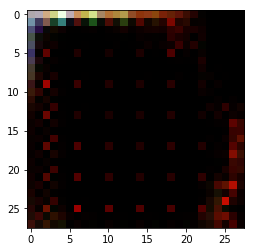

Epoch 1/1... Discriminator Loss: 1.0518... Generator Loss: 2.0708
Epoch 1/1... Discriminator Loss: 0.6970... Generator Loss: 2.1516
Epoch 1/1... Discriminator Loss: 0.7090... Generator Loss: 1.2319
Epoch 1/1... Discriminator Loss: 0.7903... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 0.9976
Epoch 1/1... Discriminator Loss: 0.7175... Generator Loss: 1.0297
Epoch 1/1... Discriminator Loss: 0.3819... Generator Loss: 1.4965
Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 1.3416
Epoch 1/1... Discriminator Loss: 0.4139... Generator Loss: 1.4794
Epoch 1/1... Discriminator Loss: 0.2680... Generator Loss: 2.4044


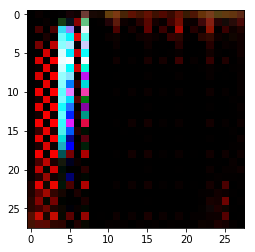

Epoch 1/1... Discriminator Loss: 0.2108... Generator Loss: 2.5018
Epoch 1/1... Discriminator Loss: 0.2498... Generator Loss: 2.4125
Epoch 1/1... Discriminator Loss: 0.2128... Generator Loss: 2.6056
Epoch 1/1... Discriminator Loss: 0.6912... Generator Loss: 2.4854
Epoch 1/1... Discriminator Loss: 0.1777... Generator Loss: 2.7407
Epoch 1/1... Discriminator Loss: 2.2141... Generator Loss: 0.3892
Epoch 1/1... Discriminator Loss: 0.2842... Generator Loss: 1.8084
Epoch 1/1... Discriminator Loss: 0.4063... Generator Loss: 1.6102
Epoch 1/1... Discriminator Loss: 0.4243... Generator Loss: 1.2950
Epoch 1/1... Discriminator Loss: 0.1863... Generator Loss: 2.5452


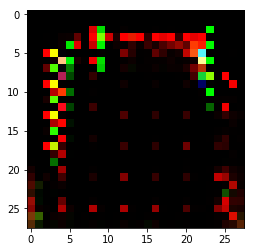

Epoch 1/1... Discriminator Loss: 0.3232... Generator Loss: 2.8996
Epoch 1/1... Discriminator Loss: 0.1393... Generator Loss: 3.0959
Epoch 1/1... Discriminator Loss: 0.1951... Generator Loss: 3.3082
Epoch 1/1... Discriminator Loss: 0.1060... Generator Loss: 3.1979
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.4378
Epoch 1/1... Discriminator Loss: 0.0914... Generator Loss: 3.6145
Epoch 1/1... Discriminator Loss: 0.0844... Generator Loss: 3.1792
Epoch 1/1... Discriminator Loss: 0.0635... Generator Loss: 3.8935
Epoch 1/1... Discriminator Loss: 0.0769... Generator Loss: 3.3559
Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 2.7669


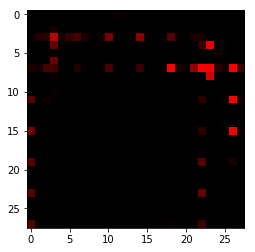

Epoch 1/1... Discriminator Loss: 3.3023... Generator Loss: 4.6905
Epoch 1/1... Discriminator Loss: 0.8369... Generator Loss: 3.8135
Epoch 1/1... Discriminator Loss: 0.1475... Generator Loss: 2.6790
Epoch 1/1... Discriminator Loss: 0.1042... Generator Loss: 3.3373
Epoch 1/1... Discriminator Loss: 0.0826... Generator Loss: 3.2577
Epoch 1/1... Discriminator Loss: 0.0842... Generator Loss: 3.5695
Epoch 1/1... Discriminator Loss: 0.0807... Generator Loss: 3.4639
Epoch 1/1... Discriminator Loss: 0.0633... Generator Loss: 3.6876
Epoch 1/1... Discriminator Loss: 0.0483... Generator Loss: 3.8939
Epoch 1/1... Discriminator Loss: 0.0529... Generator Loss: 3.8200


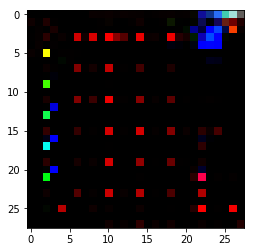

Epoch 1/1... Discriminator Loss: 0.0437... Generator Loss: 3.9456
Epoch 1/1... Discriminator Loss: 0.0802... Generator Loss: 3.4098
Epoch 1/1... Discriminator Loss: 2.6155... Generator Loss: 6.1212
Epoch 1/1... Discriminator Loss: 0.1715... Generator Loss: 3.0339
Epoch 1/1... Discriminator Loss: 0.1075... Generator Loss: 3.0940
Epoch 1/1... Discriminator Loss: 0.1188... Generator Loss: 2.6340
Epoch 1/1... Discriminator Loss: 0.0545... Generator Loss: 3.8074
Epoch 1/1... Discriminator Loss: 0.0465... Generator Loss: 3.9339
Epoch 1/1... Discriminator Loss: 0.0470... Generator Loss: 3.8868
Epoch 1/1... Discriminator Loss: 0.0419... Generator Loss: 4.0054


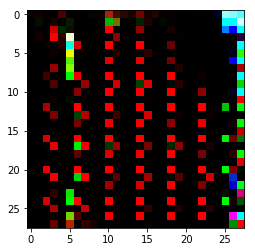

Epoch 1/1... Discriminator Loss: 0.0379... Generator Loss: 4.1193
Epoch 1/1... Discriminator Loss: 0.0441... Generator Loss: 4.0380
Epoch 1/1... Discriminator Loss: 0.0339... Generator Loss: 4.2714
Epoch 1/1... Discriminator Loss: 0.0324... Generator Loss: 4.2506
Epoch 1/1... Discriminator Loss: 0.0301... Generator Loss: 4.3799
Epoch 1/1... Discriminator Loss: 0.0282... Generator Loss: 4.3738
Epoch 1/1... Discriminator Loss: 0.0258... Generator Loss: 4.5061
Epoch 1/1... Discriminator Loss: 0.0269... Generator Loss: 4.5069
Epoch 1/1... Discriminator Loss: 0.0246... Generator Loss: 4.5817
Epoch 1/1... Discriminator Loss: 0.0264... Generator Loss: 4.5508


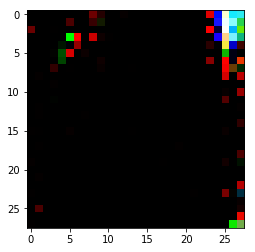

Epoch 1/1... Discriminator Loss: 0.0276... Generator Loss: 4.4525
Epoch 1/1... Discriminator Loss: 0.0274... Generator Loss: 4.5519
Epoch 1/1... Discriminator Loss: 0.0216... Generator Loss: 4.8099
Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 4.9186
Epoch 1/1... Discriminator Loss: 0.0179... Generator Loss: 5.0839
Epoch 1/1... Discriminator Loss: 0.0147... Generator Loss: 5.1866
Epoch 1/1... Discriminator Loss: 0.0157... Generator Loss: 5.2026
Epoch 1/1... Discriminator Loss: 0.0143... Generator Loss: 5.2825
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 5.0638
Epoch 1/1... Discriminator Loss: 0.0154... Generator Loss: 5.0130


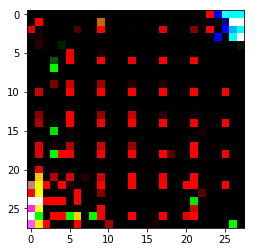

Epoch 1/1... Discriminator Loss: 0.0144... Generator Loss: 5.0906
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 5.0717
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.9350
Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 4.9553
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.9946
Epoch 1/1... Discriminator Loss: 0.0157... Generator Loss: 5.0975
Epoch 1/1... Discriminator Loss: 5.0358... Generator Loss: 3.3608
Epoch 1/1... Discriminator Loss: 0.0930... Generator Loss: 3.4376
Epoch 1/1... Discriminator Loss: 0.0516... Generator Loss: 3.8288
Epoch 1/1... Discriminator Loss: 0.0411... Generator Loss: 4.2067


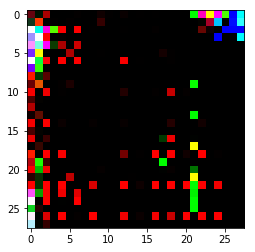

Epoch 1/1... Discriminator Loss: 0.0331... Generator Loss: 4.2810
Epoch 1/1... Discriminator Loss: 0.0310... Generator Loss: 4.3413
Epoch 1/1... Discriminator Loss: 0.0344... Generator Loss: 4.0870
Epoch 1/1... Discriminator Loss: 0.7811... Generator Loss: 3.5860
Epoch 1/1... Discriminator Loss: 0.1649... Generator Loss: 2.1099
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.9123
Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 0.1462... Generator Loss: 2.4369
Epoch 1/1... Discriminator Loss: 0.0987... Generator Loss: 2.9481
Epoch 1/1... Discriminator Loss: 0.0415... Generator Loss: 3.8947


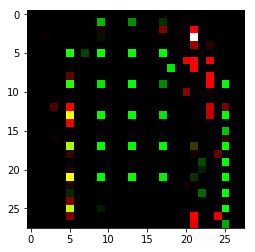

Epoch 1/1... Discriminator Loss: 0.0534... Generator Loss: 3.7253
Epoch 1/1... Discriminator Loss: 0.0409... Generator Loss: 4.0415
Epoch 1/1... Discriminator Loss: 0.0367... Generator Loss: 4.1102
Epoch 1/1... Discriminator Loss: 0.0332... Generator Loss: 4.2242
Epoch 1/1... Discriminator Loss: 0.0365... Generator Loss: 4.1143
Epoch 1/1... Discriminator Loss: 0.0327... Generator Loss: 4.2174
Epoch 1/1... Discriminator Loss: 0.0302... Generator Loss: 4.3197
Epoch 1/1... Discriminator Loss: 0.0298... Generator Loss: 4.4296
Epoch 1/1... Discriminator Loss: 0.0241... Generator Loss: 4.5673
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 4.6802


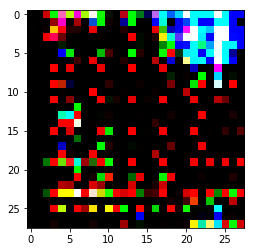

Epoch 1/1... Discriminator Loss: 0.0270... Generator Loss: 4.5392
Epoch 1/1... Discriminator Loss: 0.0244... Generator Loss: 4.4906
Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 4.7126
Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 4.7579
Epoch 1/1... Discriminator Loss: 0.0214... Generator Loss: 4.8134
Epoch 1/1... Discriminator Loss: 0.0207... Generator Loss: 4.8687
Epoch 1/1... Discriminator Loss: 0.0161... Generator Loss: 4.9374
Epoch 1/1... Discriminator Loss: 0.0180... Generator Loss: 4.9691
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.9350
Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 5.1097


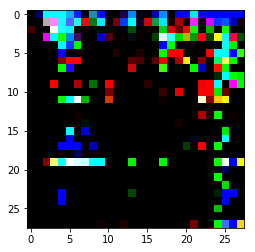

Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 5.1613
Epoch 1/1... Discriminator Loss: 0.0121... Generator Loss: 5.2723
Epoch 1/1... Discriminator Loss: 0.0132... Generator Loss: 5.2361
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 5.2628
Epoch 1/1... Discriminator Loss: 0.0118... Generator Loss: 5.4246
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 5.3552
Epoch 1/1... Discriminator Loss: 0.0129... Generator Loss: 5.5135
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 5.1540
Epoch 1/1... Discriminator Loss: 0.0115... Generator Loss: 5.7804
Epoch 1/1... Discriminator Loss: 0.0135... Generator Loss: 5.4274


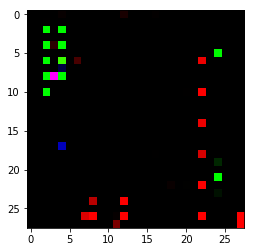

Epoch 1/1... Discriminator Loss: 0.0088... Generator Loss: 5.9222
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 5.9445
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 6.1021
Epoch 1/1... Discriminator Loss: 0.0096... Generator Loss: 5.7334
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 6.1904
Epoch 1/1... Discriminator Loss: 0.0078... Generator Loss: 5.8835
Epoch 1/1... Discriminator Loss: 0.0073... Generator Loss: 5.8678
Epoch 1/1... Discriminator Loss: 0.0076... Generator Loss: 5.9200
Epoch 1/1... Discriminator Loss: 0.0055... Generator Loss: 6.0405
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 6.2190


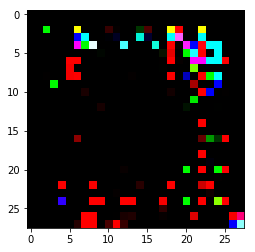

Epoch 1/1... Discriminator Loss: 0.0072... Generator Loss: 6.1143
Epoch 1/1... Discriminator Loss: 0.0064... Generator Loss: 6.1856
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 6.1471
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 6.0581
Epoch 1/1... Discriminator Loss: 0.0056... Generator Loss: 6.1103
Epoch 1/1... Discriminator Loss: 0.0055... Generator Loss: 6.0529
Epoch 1/1... Discriminator Loss: 0.0065... Generator Loss: 6.0692
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 6.0234
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 6.1757
Epoch 1/1... Discriminator Loss: 0.0059... Generator Loss: 6.0805


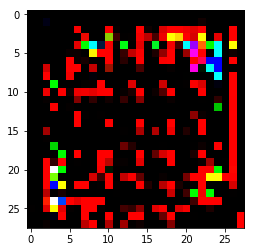

Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 6.0206
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 6.0330
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 6.0636
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 5.8961
Epoch 1/1... Discriminator Loss: 0.0067... Generator Loss: 5.8865
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 5.8918
Epoch 1/1... Discriminator Loss: 0.0071... Generator Loss: 5.8573
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 5.8553
Epoch 1/1... Discriminator Loss: 0.0074... Generator Loss: 5.8165
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 5.9727


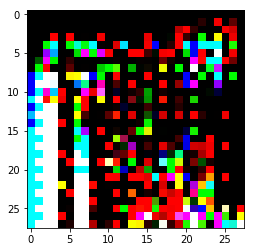

Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 6.1509
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 6.1017


In [44]:
batch_size = 100
z_dim = 100
learning_rate = 0.002
beta1 = 0.001


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.